In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from keras import layers
from sklearn.linear_model import LogisticRegression as LogRes
from sklearn.metrics import classification_report as report
from sklearn.metrics import precision_score as precision 
from sklearn.metrics import recall_score as recall
from utils import * 
from models import * 

%matplotlib inline

In [2]:
###Initial Baseline Models 

x_train, y_train = load_data("../data/Simulated_Data_Train.csv")
x_val, y_val = load_data("../data/Simulated_Data_Validation.csv")
x_test, y_test = load_data("../data/Simulated_Data_Test.csv")


In [4]:
nn = feed_forward(x_train, y_train, width = 32)
nn.train(20)


print("****** Initial Feed Forward Network *********")
print(report(y_test, nn.predict(x_test)))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                1024      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - 0s 728us/step - loss: 5.0992
Epoch 2/20
625/625 [==============================] - 0s 648us/step - loss: 3.4032
Epoch 3/20
625/625 [==============================] - 0s 565us/step - loss: 2.2437
Epoch 4/20
625/625 [==============================] - 0s 579us/step - loss: 1.9951
Epoch 5/20
625/625 [==============================] - 0s 563us/step - loss: 1.5913
Epoch 6/20
625/625 [==============================] - 0s 560us/step - loss: 0.8759
Epoch 7/20
625/6

In [6]:
def tune_model_width(build_fn, x_train, y_train, x_val, y_val, max_width = 50): 
    """
    Takes a 3-Layer nueral network and expands width to see if there 
    are tangible benefits to increasing the width of the hidden layer 
    in the model. 
    
    Parameters: 
    build_fn - function that returns a keras nn model with the specified parameters 
    x_train - the data matrix 
    y_train - the response function
    x_val - validation data
    y_val - validation data function
    """
    
    acc = []
    pre = []
    rec = []
        
    for i in range(15, max_width): 
        width = i
        model = feed_forward.build_model(x_train, y_train, width = width, suppress = True)
        model.fit(x_train, y_train, epochs = 25, verbose = 0)
    
        y_val_prob = model.predict(x_val)[:,0]
        y_val_hat = decide(y_val_prob, 0.5)

        acc.append(accuracy(y_val, y_val_hat))
        pre.append(precision(y_val, y_val_hat))
        rec.append(recall(y_val, y_val_hat))
    
    return acc, pre, rec 

acc, pre, rec = tune_model_width(feed_forward.build_model, 
                                 x_train, y_train, x_val, y_val)

C:\Users\Ayush\Anaconda3\envs\tensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayush\Anaconda3\envs\tensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayush\Anaconda3\envs\tensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayush\Anaconda3\envs\tensorFlow\lib\site-packages\sklearn\met

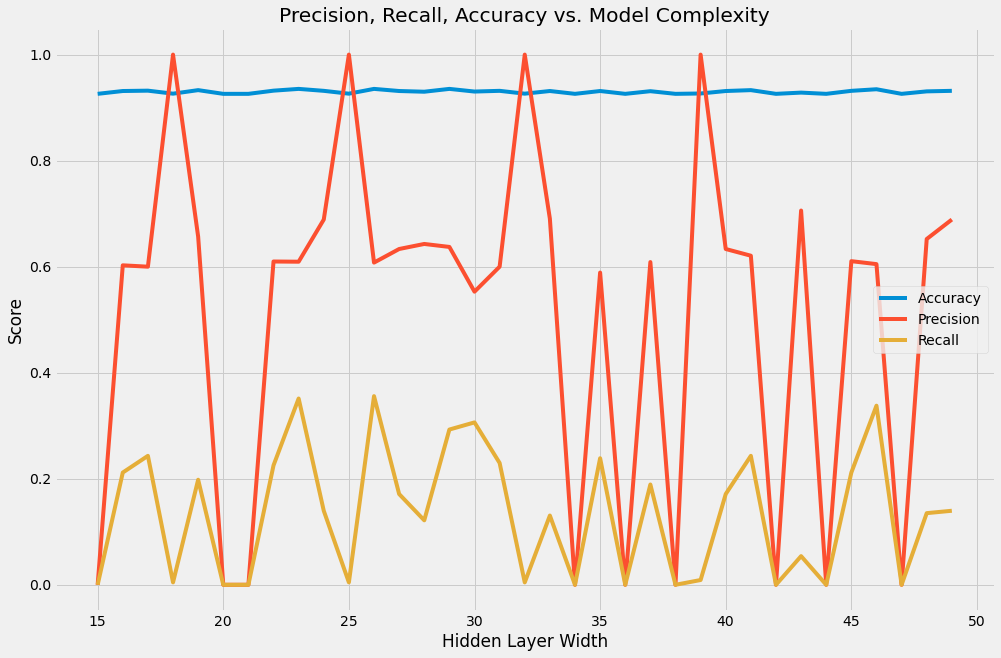

In [9]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [15, 10]

plt.title("Precision, Recall, Accuracy vs. Model Complexity")
plt.xlabel("Hidden Layer Width")
plt.ylabel("Score")

width = [_ for _ in range(15, 50)]

plt.plot(width, acc)
plt.plot(width, pre)
plt.plot(width, rec)
plt.legend(["Accuracy", "Precision", "Recall"])
plt.savefig("nn_width.png")

In [ ]:
import tqdm

precision_scores = []
recall_scores = []

for i in tqdm.tqdm(range(100)): 
    model = feed_forward(x_train, y_train, width = 32)
    model.model.fit(x_train, y_train, epochs = 100, verbose = 0)
    yhat = model.predict(x_test) 
    precision_scores.append(precision(y_test, yhat))
    recall_scores.append(recall(y_test, yhat))
    


  0%|                                                                                                                                                                                                                                                                       | 0/100 [00:00<?, ?it/s]

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  1%|██▌                                                                                                                                                                                                                                                            | 1/100 [00:26<43:24, 26.31s/it]

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  2%|█████                                                                                                                                                                                                                                                          | 2/100 [00:52<42:39, 26.12s/it]

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  3%|███████▋                                                                                                                                                                                                                                                       | 3/100 [01:18<42:27, 26.27s/it]

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  4%|██████████▏                                                                                                                                                                                                                                                    | 4/100 [01:44<41:57, 26.23s/it]

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  5%|████████████▊                                                                                                                                                                                                                                                  | 5/100 [02:12<42:03, 26.56s/it]

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  6%|███████████████▎                                                                                                                                                                                                                                               | 6/100 [02:41<42:56, 27.40s/it]

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  7%|█████████████████▊                                                                                                                                                                                                                                             | 7/100 [03:09<42:54, 27.69s/it]

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  8%|████████████████████▍                                                                                                                                                                                                                                          | 8/100 [03:37<42:31, 27.74s/it]

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  9%|██████████████████████▉                                                                                                                                                                                                                                        | 9/100 [04:09<44:09, 29.12s/it]

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 10%|█████████████████████████▍                                                                                                                                                                                                                                    | 10/100 [04:40<44:37, 29.75s/it]

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 11%|███████████████████████████▉                                                                                                                                                                                                                                  | 11/100 [05:06<42:28, 28.63s/it]

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 12%|██████████████████████████████▍                                                                                                                                                                                                                               | 12/100 [05:33<41:10, 28.07s/it]

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 13%|█████████████████████████████████                                                                                                                                                                                                                             | 13/100 [05:59<39:55, 27.54s/it]

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 14%|███████████████████████████████████▌                                                                                                                                                                                                                          | 14/100 [06:25<38:38, 26.96s/it]

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


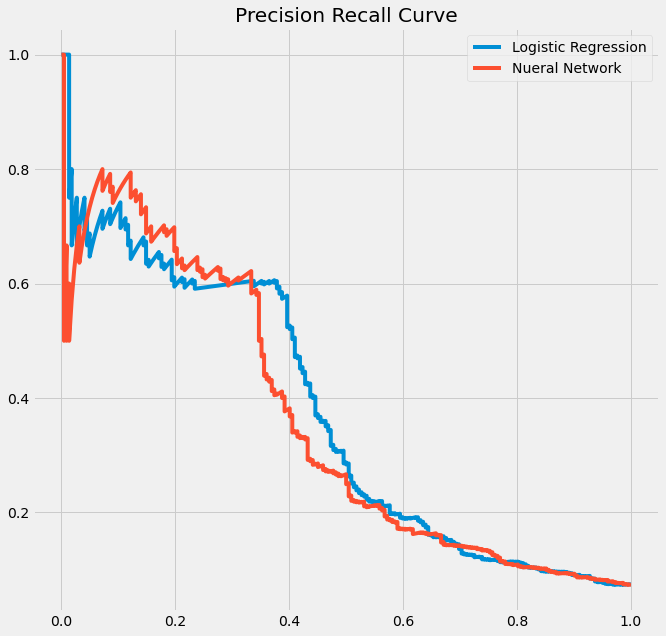

In [4]:
from sklearn.metrics import precision_recall_curve

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10,10]

precision_nn, recall_nn, _ = precision_recall_curve(y_val ,nn.predict_proba(x_val))
precision_lr, recall_lr, _ = precision_recall_curve(y_val ,lr.predict(x_val))

plt.title("Precision Recall Curve")
plt.plot(recall_nn, precision_nn)
plt.plot(recall_lr, precision_lr)

plt.legend(["Logistic Regression", "Nueral Network"])



In [20]:
train_df = load_data("../data/Simulated_Data_Train.csv", as_df = True)
train_df.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,uti_card_50plus_pct,ind_acc_XYZ,rep_income,Default_ind,FL,SC,LA,GA,MS,NC
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.489594,0.0,69000.000000,0.0,0,0,0,0,0,0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,0.587351,0.0,61000.000000,0.0,1,0,0,0,0,0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,...,0.413293,0.0,75499.511666,0.0,0,0,0,0,0,0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,0.466810,0.0,79000.000000,1.0,0,1,0,0,0,0
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,...,0.588442,1.0,75499.511666,0.0,0,0,1,0,0,0


In [ ]:
def tune_model_width(build_fn, x_train, y_train, x_val, y_val, max_width = 50): 
    """
    Takes a 3-Layer nueral network and expands width to see if there 
    are tangible benefits to increasing the width of the hidden layer 
    in the model. 
    
    Parameters: 
    build_fn - function that returns a keras nn model with the specified parameters 
    x_train - the data matrix 
    y_train - the response function
    x_val - validation data
    y_val - validation data function
    """
    width = 20
    model = feed_forward.build_model(x_train, y_train, width = width, suppress = True)
    model.fit(x_train, y_train, epochs = 25, verbose = 0)
    
    y_val_prob = model.predict(x_val)[:,0]
    y_val_hat = decide(y_val_prob, 0.5)
    
    validation_accuracy = accuracy(y_val, y_val_hat)
    
    y_train_prob = model.predict(x_train)[:,0]
    y_train_hat = decide(y_train_prob, 0.5)
    
    training_accuracy = accuracy(y_train, y_train_hat)
    
    distance = training_accuracy - validation_accuracy
    
    print(f"Width: {width}, Training_Accuracy = {training_accuracy}, Validation Accuracy = {validation_accuracy}")
    
    for i in range(21, max_width): 
        width = i
        
        model = build_fn(x_train, y_train, width = width, suppress = True)
        model.fit(x_train, y_train, epochs = 25, verbose = 0)

        y_val_prob = model.predict(x_val)[:,0]
        y_val_hat = decide(y_val_prob, 0.5)

        validation_accuracy = accuracy(y_val, y_val_hat)

        y_train_prob = model.predict(x_val)[:,0]
        y_train_hat = decide(y_train_hat, 0.5)

        training_accuracy = accuracy(y_train, y_train_hat)

        print(f"Width: {width}, Training_Accuracy = {training_accuracy}, Validation Accuracy = {validation_accuracy}")
    

tune_model_width(build_fn, x_train, y_train, x_val, y_val)